In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Data Cleaning

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/Penguins_Competition/Sea-Level-Change-Impacts.csv

drive/MyDrive/Penguins_Competition/Sea-Level-Change-Impacts.csv


In [4]:
data = pd.read_csv('drive/MyDrive/Penguins_Competition/Sea-Level-Change-Impacts.csv')

In [ ]:
data.head()

,Year,Sea Level Change,Coastal Flooding Events,Flood Events,Storm Surge Events,California Floods,White,African American,American Indian and Alaskan Native,Asian or Pacific Islander,Below Poverty Level (%)
0,1996,-4,0,3,0,40,388341,78931,3354,211000,12.4
1,1997,56,0,0,0,121,388341,78931,3354,211000,12.4
2,1998,62,0,0,0,189,388341,78931,3354,211000,12.4
3,1999,-50,0,0,0,76,388341,78931,3354,211000,12.4
4,2000,-28,0,0,0,88,385728,60515,3458,243409,6.6


In [ ]:
data.corr()

,Year,Sea Level Change,Coastal Flooding Events,Flood Events,Storm Surge Events,California Floods,White,African American,American Indian and Alaskan Native,Asian or Pacific Islander,Below Poverty Level (%)
Year,1.000000,0.486709,0.774553,0.596608,0.105429,0.329889,0.626509,-0.891210,0.890662,0.911218,0.376354
Sea Level Change,0.486709,1.000000,0.589525,0.536743,-0.053385,0.689323,0.527372,-0.286244,0.472093,0.330487,0.484522
Coastal Flooding Events,0.774553,0.589525,1.000000,0.777697,0.029531,0.452122,0.500394,-0.608110,0.670763,0.635960,0.321887
Flood Events,0.596608,0.536743,0.777697,1.000000,-0.106104,0.537656,0.446058,-0.402025,0.494999,0.430001,0.352003
Storm Surge Events,0.105429,-0.053385,0.029531,-0.106104,1.000000,-0.116400,0.223507,-0.196207,0.244896,0.210534,0.178272
California Floods,0.329889,0.689323,0.452122,0.537656,-0.116400,1.000000,0.316506,-0.180196,0.288359,0.206252,0.287750
White,0.626509,0.527372,0.500394,0.446058,0.223507,0.316506,1.000000,-0.463738,0.847882,0.552299,0.947320
African American,-0.891210,-0.286244,-0.608110,-0.402025,-0.196207,-0.180196,-0.463738,1.000000,-0.862924,-0.994709,-0.155541
American Indian and Alaskan Native,0.890662,0.472093,0.670763,0.494999,0.244896,0.288359,0.847882,-0.862924,1.000000,0.910271,0.633404
Asian or Pacific Islander,0.911218,0.330487,0.635960,0.430001,0.210534,0.206252,0.552299,-0.994709,0.910271,1.000000,0.256197


<Axes: >

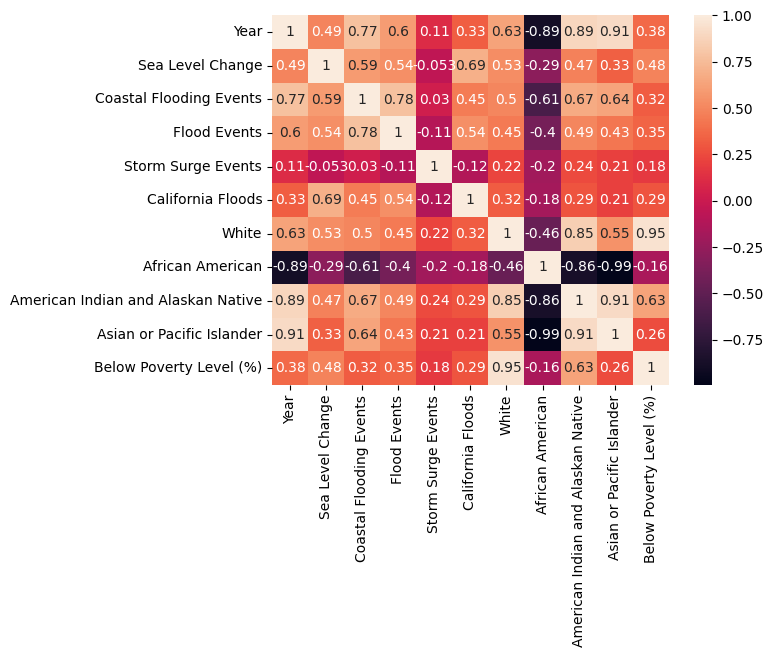

In [ ]:
sns.heatmap(data.corr(),annot=True)

# Multivariate Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']],test_size = 0.2,train_size=0.8, random_state=42)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 237.80636508903706
R-Squared: -0.7897596431980263


In [ ]:
y_pred = mlr.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 207.42239018533337
R-Squared: 0.2539041417815534


# Simple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events']],test_size = 0.2,train_size=0.8, random_state=42)

In [ ]:
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 0.4473623553654636
R-Squared: 0.49671735021385355


In [ ]:
y_pred = mlr.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 0.6843715366219594
R-Squared: 0.28711298268545904


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['California Floods']],test_size = 0.2,train_size=0.8, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state=42)

In [ ]:
y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 8218.591129757164
R-Squared: -5.905089634784772


# Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change','California Floods']], data[['Coastal Flooding Events']],test_size = 0.2,train_size=0.8, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state=42)

In [ ]:
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 0.45081098691641874
R-Squared: 0.49283763971902894


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change','California Floods']], data[['Coastal Flooding Events']],test_size = 0.2,train_size=0.8, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state=42)

In [ ]:
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())

MSE: 0.45081098691641874
R-Squared: 0.49283763971902894
                                   OLS Regression Results                                   
Dep. Variable:     Coastal Flooding Events   R-squared (uncentered):                   0.383
Model:                                 OLS   Adj. R-squared (uncentered):              0.311
Method:                      Least Squares   F-statistic:                              5.283
Date:                     Sat, 23 Mar 2024   Prob (F-statistic):                      0.0164
Time:                             22:25:18   Log-Likelihood:                         -27.320
No. Observations:                       19   AIC:                                      58.64
Df Residuals:                           17   BIC:                                      60.53
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
              

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y, y_test = train_test_split(data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], data[['Sea Level Change']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
mlr = linear_model.LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

y_pred = mlr.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)
est = sm.OLS(y_train, x_train)
est2 = est.fit()
print(est2.summary())

MSE: 4253.666666666667
R-Squared: -3.676643049108235
                                 OLS Regression Results                                
Dep. Variable:      California Floods   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.413e+31
Date:                Sat, 23 Mar 2024   Prob (F-statistic):                   4.05e-229
Time:                        22:41:11   Log-Likelihood:                          549.37
No. Observations:                  19   AIC:                                     -1091.
Df Residuals:                      15   BIC:                                     -1087.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Decision Trees


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate,x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = reg_model.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 475.27083333333337
R-Squared: -0.6083215609806282


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], data[['Sea Level Change']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = reg_model.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 469.6666666666667
R-Squared: 0.48363058881016363


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Flood Events']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_model = DecisionTreeRegressor(random_state=42)
reg_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = reg_model.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 66.0
R-Squared: -1.020408163265306


# Random Forest


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], test_size = 0.3,train_size=0.7, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = rf_model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 732.3719406250001
R-Squared: -0.24888545329043826


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], data[['Sea Level Change']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

<ipython-input-31-188e7c62b6db>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = rf_model.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 214.13846666666666
R-Squared: 0.7645680185682873


In [ ]:
y_pred = rf_model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 2500.28045
R-Squared: -1.6017486472424558


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], data[['Sea Level Change']], test_size = 0.25,train_size=0.75, random_state = 42)
#x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10000, random_state=42)
rf_model.fit(x_train, y_train)

<ipython-input-36-9e8b6edef5a4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10000, random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 1420.3298641833335
R-Squared: -0.052247754009837166


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change', 'Flood Events', 'Coastal Flooding Events']], data[['California Floods']], test_size = 0.2,train_size=0.8, random_state = 42)
x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

<ipython-input-176-188e7c62b6db>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = rf_model.predict(x_validate)
model_error = mean_squared_error(y_validate, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_pred)
print("R-Squared:",r_squared)

MSE: 1782.0348666666662
R-Squared: -0.4972286967886479


# Polynomial Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events', 'Flood Events', 'Storm Surge Events', 'California Floods']], test_size = 0.2,train_size=0.8, random_state = 42)
#x_validate,x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=False)

poly_features = poly.fit_transform(x_train)

poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, y_train)

poly_features = poly.transform(x_validate)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_poly_pred = poly_reg_model.predict(poly_features)
model_error = mean_squared_error(y_validate, y_poly_pred)
print("MSE:",model_error)
r_squared = r2_score(y_validate, y_poly_pred)
print("R-Squared:",r_squared)

MSE: 279.5835843220126
R-Squared: 0.33921428756584376


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
poly_features = poly.fit_transform(x_train)
poly_features = poly.transform(x_test)

y_poly_pred = poly_reg_model.predict(poly_features)
model_error = mean_squared_error(y_test, y_poly_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_poly_pred)
print("R-Squared:",r_squared)

MSE: 216.551625429542
R-Squared: 0.11416288318046708


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change', 'Coastal Flooding Events']], data[['Flood Events']], test_size = 0.25,train_size=0.75, random_state = 42)
#x_validate,x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias=False)

poly_features = poly.fit_transform(x_train)

poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, y_train)

poly_features = poly.transform(x_test)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_poly_pred = poly_reg_model.predict(poly_features)
model_error = mean_squared_error(y_test, y_poly_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_poly_pred)
print("R-Squared:",r_squared)

MSE: 4.2120156700428035
R-Squared: 0.8393722837695541


# Gradient Boosting Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change']], data[['Coastal Flooding Events']], test_size = 0.25,train_size=0.75, random_state = 42)
#x_validate,x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gr_model = GradientBoostingRegressor()
gr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [ ]:
y_pred = gr_model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 1.4979544561954288
R-Squared: -0.8595296697598427


# AdaBoost Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[['Sea Level Change', 'Coastal Flooding Events']], data[['Flood Events']], test_size = 0.25,train_size=0.75, random_state = 42)
#x_validate,x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.25, train_size=0.75, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=0, n_estimators=50)

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=0)

In [ ]:
y_pred = model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 55.85574074074074
R-Squared: -1.1300918079096047


# ExtraTrees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100, random_state=0)

model.fit(x_train,y_train)

<ipython-input-26-3ad0974f6159>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


ExtraTreesRegressor(random_state=0)

In [ ]:
y_pred = model.predict(x_test)
model_error = mean_squared_error(y_test, y_pred)
print("MSE:",model_error)
r_squared = r2_score(y_test, y_pred)
print("R-Squared:",r_squared)

MSE: 21.446833333333334
R-Squared: 0.1821122881355931
